# Support Vector Machine using IRIS Data Set

Classification practice using the IRIS dataset (which maps features to species of the Iris flower)

### Definitions
**Separating line** or **Hyperplane** - divides the data set so as to maximize the minimum distance between the two classes of data.

**Support Vectors** - points in the data set that are closest to the hypeerplane

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
from sklearn import svm, datasets

In [6]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
col=['petal_length','petal_width','species']
df.loc[:,col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [4]:
col=['petal_length','petal_width']
X = df.loc[:,col]

In [10]:
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica':2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [29]:
C = 0.1
svc = svm.SVC(kernel='linear',C=C)
#svc = svm.LinearSVC(C=C,loss='hinge')
#svc = svm.SVC(kernel='poly',degree=3,C=C)
#svc = svm.SVC(kernel='rbf',gamma=0.7,C=C)
svc.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
svc.predict([[6,2]])

array([2])

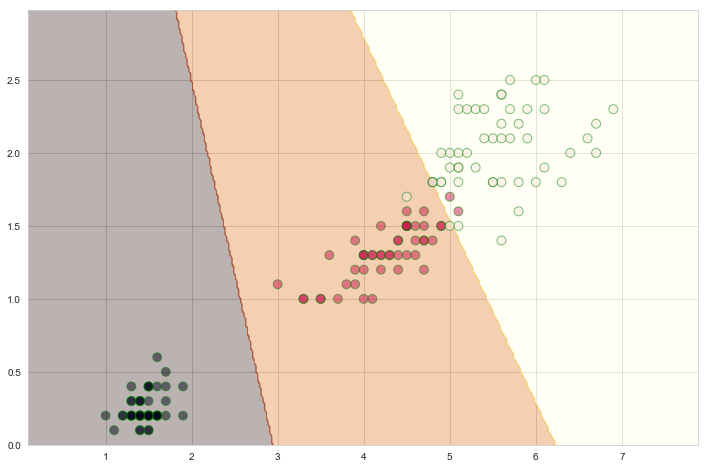

In [30]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig=plt.figure(figsize=(12,8))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.5,edgecolors='g')

## Linear SVM Implementation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Scale features

In [36]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [37]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C)
svc.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


#### Cross validation within training dataset

In [43]:
res = cross_val_score(svc, X_std_train,y_train, cv=10,scoring='accuracy')
print("Accuracy MEAN: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t {0:.4f}".format(np.std(res)))

Accuracy MEAN: 	 0.9501
Accuracy SD: 	 0.0538


In [44]:
y_train_pred = cross_val_predict(svc, X_std_train, y_train,cv=3)

In [45]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]])

In [47]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train,y_train_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_train,y_train_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_train,y_train_pred, average='weighted')))

Precision Score: 	 0.9500
Recall Score: 	 0.9500
f1 Score: 	 0.9500


#### Cross validation within test data set

In [49]:
y_test_pred = cross_val_predict(svc, sc_x.transform(X_test), y_test, cv=3)

In [50]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])

In [51]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,y_test_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_test,y_test_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_test,y_test_pred, average='weighted')))

Precision Score: 	 0.9422
Recall Score: 	 0.9333
f1 Score: 	 0.9290


### Linear SVM Implementation with training set = 60%

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=0)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [55]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)
C = 1.0
svc = svm.SVC(kernel='linear', C=C)
svc.fit(X_std_train, y_train)
res = cross_val_score(svc, X_std_train,y_train, cv=10,scoring='accuracy')
print("Accuracy MEAN: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t {0:.4f}".format(np.std(res)))
y_train_pred = cross_val_predict(svc, X_std_train, y_train,cv=3)
confusion_matrix(y_train, y_train_pred)

Accuracy MEAN: 	 0.9764
Accuracy SD: 	 0.0473


array([[34,  0,  0],
       [ 0, 25,  2],
       [ 0,  0, 29]])

In [56]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train,y_train_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_train,y_train_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_train,y_train_pred, average='weighted')))

Precision Score: 	 0.9792
Recall Score: 	 0.9778
f1 Score: 	 0.9777


In [57]:
y_test_pred = cross_val_predict(svc, sc_x.transform(X_test), y_test, cv=3)
confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  3, 18]])

In [58]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,y_test_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_test,y_test_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_test,y_test_pred, average='weighted')))

Precision Score: 	 0.9356
Recall Score: 	 0.9333
f1 Score: 	 0.9331


### Linear SVM Implementation with C = 0.5

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [60]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)
C = 0.5
svc = svm.SVC(kernel='linear', C=C)
svc.fit(X_std_train, y_train)
res = cross_val_score(svc, X_std_train,y_train, cv=10,scoring='accuracy')
print("Accuracy MEAN: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t {0:.4f}".format(np.std(res)))
y_train_pred = cross_val_predict(svc, X_std_train, y_train,cv=3)
confusion_matrix(y_train, y_train_pred)

Accuracy MEAN: 	 0.9501
Accuracy SD: 	 0.0538


array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]])

In [61]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train,y_train_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_train,y_train_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_train,y_train_pred, average='weighted')))

Precision Score: 	 0.9500
Recall Score: 	 0.9500
f1 Score: 	 0.9500


In [62]:
y_test_pred = cross_val_predict(svc, sc_x.transform(X_test), y_test, cv=3)
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3,  3]])

In [63]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,y_test_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_test,y_test_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_test,y_test_pred, average='weighted')))

Precision Score: 	 0.9187
Recall Score: 	 0.9000
f1 Score: 	 0.8885


## Polynomial SVC

In [87]:
C = 1
svc = svm.SVC(kernel='poly', degree=5, C=C)
svc.fit(X, y)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

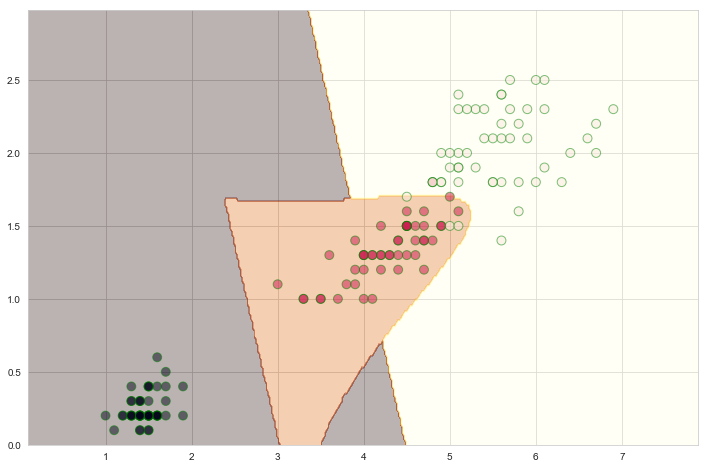

In [88]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig=plt.figure(figsize=(12,8))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.5,edgecolors='g')

### Polynomial SVM Implementation

In [89]:
svc.fit(X_std_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [90]:
res = cross_val_score(svc, X_std_train,y_train, cv=10,scoring='accuracy')
print("Accuracy MEAN: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t {0:.4f}".format(np.std(res)))
y_train_pred = cross_val_predict(svc, X_std_train, y_train,cv=3)
confusion_matrix(y_train, y_train_pred)

Accuracy MEAN: 	 0.9371
Accuracy SD: 	 0.0900


/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0, 10, 34]])

In [91]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train,y_train_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_train,y_train_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_train,y_train_pred, average='weighted')))

Precision Score: 	 0.9344
Recall Score: 	 0.9167
f1 Score: 	 0.9163


In [93]:
y_test_pred = cross_val_predict(svc, sc_x.transform(X_test), y_test, cv=3)
confusion_matrix(y_test, y_test_pred)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  4,  2]])

In [94]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,y_test_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_test,y_test_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_test,y_test_pred, average='weighted')))

Precision Score: 	 0.8980
Recall Score: 	 0.8667
f1 Score: 	 0.8422


## Gaussian Radial Basis Function (rbf)

In [158]:
C = 0.1
svc = svm.SVC(kernel='rbf', gamma=0.25, C=C)
svc.fit(X, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

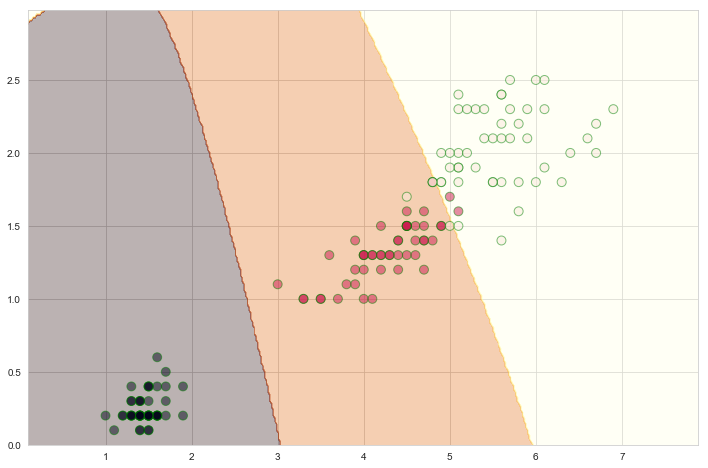

In [159]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig=plt.figure(figsize=(12,8))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.5,edgecolors='g')

In [97]:
svc.fit(X_std_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
res = cross_val_score(svc, X_std_train,y_train, cv=10,scoring='accuracy')
print("Accuracy MEAN: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t {0:.4f}".format(np.std(res)))
y_train_pred = cross_val_predict(svc, X_std_train, y_train,cv=3)
confusion_matrix(y_train, y_train_pred)

Accuracy MEAN: 	 0.9501
Accuracy SD: 	 0.0538


array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]])

In [99]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train,y_train_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_train,y_train_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_train,y_train_pred, average='weighted')))

Precision Score: 	 0.9586
Recall Score: 	 0.9583
f1 Score: 	 0.9584


In [100]:
y_test_pred = cross_val_predict(svc, sc_x.transform(X_test), y_test, cv=3)
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])

In [101]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,y_test_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_test,y_test_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_test,y_test_pred, average='weighted')))

Precision Score: 	 0.9422
Recall Score: 	 0.9333
f1 Score: 	 0.9290


## Grid Search

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)
X_std_train = sc_x.fit_transform(X_train)
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf',C=1,gamma=0.1))])
params = {'clf__C':(0.1,0.5,1,2,5,10,20), 'clf__gamma':(0.001,0.1,0.1,0.25,0.5,0.75,1)}

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [140]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,cv=3,verbose=1,scoring='accuracy')

In [150]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    0.4s finished
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.1, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [151]:
svm_grid_rbf.best_score_

0.9583333333333334

In [152]:
best = svm_grid_rbf.best_estimator_.get_params()

In [153]:
best

{'memory': None,
 'steps': [('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))],
 'clf': SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'clf__C': 0.1,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 0.25,
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [154]:
for k in sorted(params.keys()):
    print('\t{0}: \t {1:.2f}'.format(k,best[k]))

	clf__C: 	 0.10
	clf__gamma: 	 0.25


In [155]:
X_std_test = sc_x.fit_transform(X_test)
y_test_pred = svm_grid_rbf.predict(X_test)

In [156]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [157]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,y_test_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_test,y_test_pred, average='weighted')))
print("f1 Score: \t {0:.4f}".format(f1_score(y_test,y_test_pred, average='weighted')))

Precision Score: 	 1.0000
Recall Score: 	 1.0000
f1 Score: 	 1.0000


## Support Vector Regression

In [161]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [173]:
svr = SVR()
svr.fit(X_train,y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
print("MSE train: {0:.4f}, test: {1:.4f}".format(mean_squared_error(y_train, y_train_pred),
                                                mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".format(r2_score(y_train, y_train_pred),
                                                r2_score(y_test, y_test_pred)))

MSE train: 0.0301, test: 0.0215
R^2 train: 0.9564, test: 0.9600


/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Linear

In [174]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
print("MSE train: {0:.4f}, test: {1:.4f}".format(mean_squared_error(y_train, y_train_pred),
                                                mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".format(r2_score(y_train, y_train_pred),
                                                r2_score(y_test, y_test_pred)))

MSE train: 0.0487, test: 0.0535
R^2 train: 0.9295, test: 0.9008


### Poly

In [179]:
svr = SVR(kernel='poly',degree=2,C=1e3)
svr.fit(X_train,y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
print("MSE train: {0:.4f}, test: {1:.4f}".format(mean_squared_error(y_train, y_train_pred),
                                                mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".format(r2_score(y_train, y_train_pred),
                                                r2_score(y_test, y_test_pred)))

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MSE train: 0.0653, test: 0.0519
R^2 train: 0.9053, test: 0.9036


### RBG

In [181]:
svr = SVR(kernel='rbf',gamma=0.1,C=1e3)
svr.fit(X_train,y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
print("MSE train: {0:.4f}, test: {1:.4f}".format(mean_squared_error(y_train, y_train_pred),
                                                mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".format(r2_score(y_train, y_train_pred),
                                                r2_score(y_test, y_test_pred)))

MSE train: 0.0308, test: 0.0265
R^2 train: 0.9554, test: 0.9509
